In [11]:
import pandas as pd 
import numpy as np 
from pathlib import Path
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from ngboost import NGBRegressor
from ngboost.distns import Exponential, Normal, LogNormal
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
#import the data
creep_df = pd.read_csv('../Data/Ni_superalloys_dataset.csv')
# convert df to float32 for specific libraries requiments
creep_df = creep_df.astype('float32')
# log tranform creep rupture life
Log_Creep_Life = np.log10(creep_df['creep_rupture_life'])
creep_df['Log_Creep_Life'] = Log_Creep_Life
creep_df = creep_df.drop(columns = ['creep_rupture_life'])

# sort the values in ascending creep life
creep_df.sort_values(by=['Log_Creep_Life'], ascending=True, ignore_index=True, inplace=True)

In [13]:
creep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ni              153 non-null    float32
 1   Al              153 non-null    float32
 2   Co              153 non-null    float32
 3   Cr              153 non-null    float32
 4   Mo              153 non-null    float32
 5   Re              153 non-null    float32
 6   Ru              153 non-null    float32
 7   Ta              153 non-null    float32
 8   W               153 non-null    float32
 9   Ti              153 non-null    float32
 10  Nb              153 non-null    float32
 11  T               153 non-null    float32
 12  stress          153 non-null    float32
 13  Log_Creep_Life  153 non-null    float32
dtypes: float32(14)
memory usage: 8.5 KB


In [14]:
# Extract features and targets
features = creep_df.iloc[:, 0:13]
targets = creep_df.iloc[:, 13]
features

,Ni,Al,Co,Cr,Mo,Re,Ru,Ta,W,Ti,Nb,T,stress
0,61.000000,5.6,9.0,4.3,2.0,2.0,0.0,7.5,8.0,0.0,0.5,1070.0,272.0
1,61.000000,5.6,9.0,4.3,2.0,2.0,0.0,7.5,8.0,0.0,0.5,1100.0,220.0
2,61.000000,5.6,9.0,4.3,2.0,2.0,0.0,7.5,8.0,0.0,0.5,1100.0,225.0
3,61.000000,5.6,9.0,4.3,2.0,2.0,0.0,7.5,8.0,0.0,0.5,1070.0,280.0
4,61.000000,5.6,9.0,4.3,2.0,2.0,0.0,7.5,8.0,0.0,0.5,1100.0,210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,61.680000,6.0,9.0,3.5,1.5,4.0,0.0,8.0,6.0,0.2,0.0,1100.0,120.0
149,59.299999,5.8,5.8,2.9,3.9,4.9,6.0,5.6,5.8,0.0,0.0,1000.0,245.0
150,59.799999,5.6,5.6,4.6,2.4,6.4,5.0,5.6,5.0,0.0,0.0,1000.0,245.0
151,59.299999,5.8,5.8,2.9,3.9,4.9,6.0,5.6,5.8,0.0,0.0,1100.0,137.0


In [15]:
def coverage(y, yL, yH):
    return np.sum(100 / y.shape[0] * ((y>yL)&(y<yH)))

Run # 1 Fold # 1
[iter 0] loss=0.6808 val_loss=0.8271 scale=1.0000 norm=0.6427
[iter 100] loss=0.1692 val_loss=0.2653 scale=2.0000 norm=0.7492
== Early stopping achieved.
== Best iteration / VAL192 (val_loss=0.1523)
Pearson CC: 0.7555079442529968
R2 score: 0.557148654104675
RMSE: 0.21864286421885995
MAE: 0.17932748056643108
Coverage: 99.99999999999994
Interval Width: 1.1744773937122537
Composite Metric: 0.962860631748566


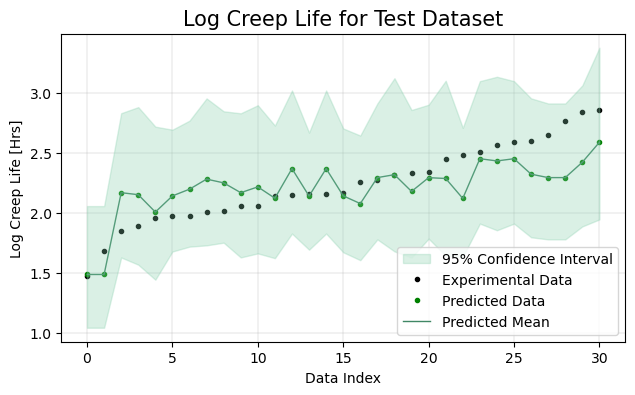

Run # 1 Fold # 2
[iter 0] loss=0.5442 val_loss=0.7392 scale=1.0000 norm=0.6134
[iter 100] loss=0.0729 val_loss=0.1327 scale=2.0000 norm=0.7182
[iter 200] loss=-0.1743 val_loss=-0.0419 scale=1.0000 norm=0.3459
[iter 300] loss=-0.3461 val_loss=-0.1019 scale=1.0000 norm=0.3368
== Early stopping achieved.
== Best iteration / VAL335 (val_loss=-0.1090)
Pearson CC: 0.7690765944243333
R2 score: 0.5820381579562282
RMSE: 0.3264595258283543
MAE: 0.2579900094142192
Coverage: 83.87096774193543
Interval Width: 0.8450009521224842
Composite Metric: 0.9248899128660243


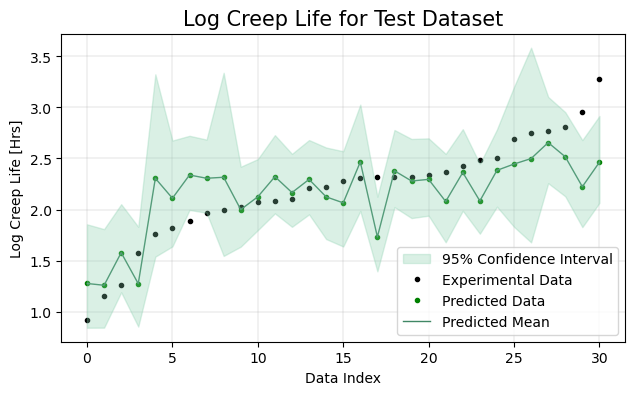

Run # 1 Fold # 3
[iter 0] loss=0.5974 val_loss=0.8014 scale=1.0000 norm=0.6344
[iter 100] loss=0.2203 val_loss=0.2895 scale=2.0000 norm=0.7764
[iter 200] loss=-0.0444 val_loss=0.0889 scale=1.0000 norm=0.3679
[iter 300] loss=-0.2584 val_loss=-0.0233 scale=1.0000 norm=0.3548
[iter 400] loss=-0.4437 val_loss=-0.0933 scale=2.0000 norm=0.6842
== Early stopping achieved.
== Best iteration / VAL407 (val_loss=-0.0961)
Pearson CC: 0.8605644627922715
R2 score: 0.7247595885187696
RMSE: 0.22824911305115544
MAE: 0.18594314480975618
Coverage: 87.09677419354833
Interval Width: 0.7861020896095405
Composite Metric: 0.9712506575548272


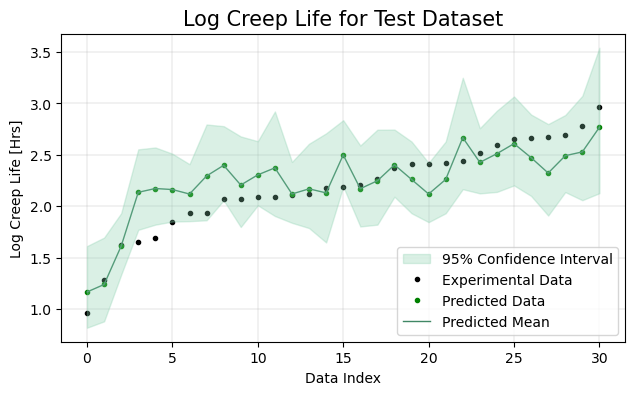

Run # 1 Fold # 4
[iter 0] loss=0.6648 val_loss=0.7457 scale=1.0000 norm=0.6240
[iter 100] loss=0.2289 val_loss=0.2090 scale=2.0000 norm=0.7745
[iter 200] loss=-0.0269 val_loss=0.0473 scale=1.0000 norm=0.3626
[iter 300] loss=-0.2316 val_loss=-0.0083 scale=1.0000 norm=0.3577
== Early stopping achieved.
== Best iteration / VAL302 (val_loss=-0.0087)
Pearson CC: 0.7628621916702452
R2 score: 0.5063930257370856
RMSE: 0.2582143067367102
MAE: 0.21375338255515977
Coverage: 93.33333333333331
Interval Width: 0.9995989269690618
Composite Metric: 0.950100308488764


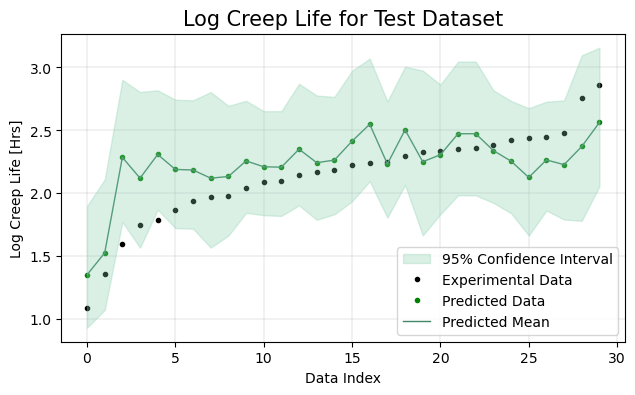

Run # 1 Fold # 5
[iter 0] loss=0.6344 val_loss=0.7059 scale=1.0000 norm=0.6120
[iter 100] loss=0.2349 val_loss=0.2355 scale=1.0000 norm=0.3822
[iter 200] loss=0.0026 val_loss=0.0711 scale=2.0000 norm=0.7246
[iter 300] loss=-0.2486 val_loss=-0.0063 scale=2.0000 norm=0.7131
== Early stopping achieved.
== Best iteration / VAL315 (val_loss=-0.0122)
Pearson CC: 0.5811198863812593
R2 score: 0.15873107742793013
RMSE: 0.3619752631487009
MAE: 0.2803588363304249
Coverage: 89.99999999999997
Interval Width: 0.9524662377618425
Composite Metric: 0.9374764953217276


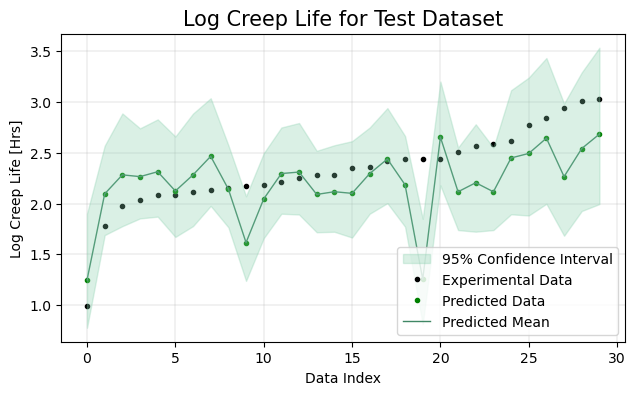

In [16]:
# Evaluate multiple runs of the model
nruns = 1
nfolds = 5

# Metrics for performance evaluation
PearsonCC = np.zeros((nruns, nfolds))
R2_score = np.zeros_like(PearsonCC)
RMSE = np.zeros_like(PearsonCC)
MAE = np.zeros_like(PearsonCC)

test_coverage = np.zeros_like(PearsonCC)
median_interval_width = np.zeros_like(PearsonCC)
composite_metric = np.zeros_like(PearsonCC)
for j in range(nruns):

        kf = KFold(n_splits=nfolds, shuffle=True, random_state=123+j)

        for i, (tr, ts) in enumerate(kf.split(targets)):
            
            # Display the run number
            print('Run #', j+1, "Fold #", i+1)
            
            X_train, X_test = features.iloc[tr], features.iloc[ts]
            y_train, y_test = targets[tr], targets[ts]
            X_train, X_val, y_train, Y_val =train_test_split(X_train, y_train, test_size=0.2, random_state=42)
            
            model = NGBRegressor(Dist=LogNormal, n_estimators=1000, learning_rate=0.005)

            model.fit(X_train, y_train, X_val=X_val, Y_val=Y_val, early_stopping_rounds=4)

            y_pred_test = model.predict(X_test)
            
            y_test_ngb = model.pred_dist(X_test)

            PearsonCC[j, i] = pearsonr(y_test, y_pred_test)[0]
            R2_score[j, i] = r2_score(y_test, y_pred_test)
            RMSE[j, i] = sqrt(mean_squared_error(y_pred_test, y_test))
            MAE[j, i] = np.mean(abs(y_pred_test-y_test))
            
            print(f'Pearson CC: {PearsonCC[j, i]}')
            print(f'R2 score: {R2_score[j, i]}')
            print(f'RMSE: {RMSE[j, i]}')
            print(f'MAE: {MAE[j, i]}')
            
            df_test_low = y_test_ngb.interval(0.95)[0]
            df_test_median = y_pred_test
            df_test_high = y_test_ngb.interval(0.95)[1]
            
            test_coverage[j, i] = coverage(y_test, df_test_low, df_test_high)
            print(f'Coverage: {test_coverage[j, i]}')

            # Prediction interval width
            median_interval_width[j, i] = np.median(df_test_high - df_test_low)
            print(f'Interval Width: {median_interval_width[j, i]}')

            # Composite metric that combines the coverage and the invers of interval width
            composite_metric[j, i] = 0.75*test_coverage[j, i]/100 + 0.25*(1/median_interval_width[j, i])
            print(f'Composite Metric: {composite_metric[j, i]}')
          
            # Plot the predictions
            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
            iteration_list = [i for i in range(len(y_test))]

            y_pred = y_pred_test
            y_std = np.std(np.array(y_pred_test), axis=0)

            ## Uncertainty quantification plot
            ax[0].fill_between(iteration_list, df_test_low, df_test_high, alpha=0.3, color='#86cfac', zorder=5, label='95% Confidence Interval')
            ax[0].plot(iteration_list, y_test, 'ko', markersize=3, label="Experimental Data")
            ax[0].plot(iteration_list, y_pred, 'go', markersize=3, label="Predicted Data")
            ax[0].plot(iteration_list, y_pred, '-', linewidth=1, color="#408765", label="Predicted Mean")
            ax[0].legend(loc=4, fontsize=10, frameon=True)
            ax[0].set_xlabel("Data Index", fontsize=10)
            ax[0].set_ylabel("Log Creep Life [Hrs]", fontsize=10)
            ax[0].set_title("Log Creep Life for Test Dataset", fontsize=15)
            ax[0].grid(True, which='major', linestyle='-', linewidth='0.25')
            fig.delaxes(ax[1])

            plt.show()

In [17]:
# Data frame
df1 = pd.DataFrame({'Pearson CC': PearsonCC.flatten(), 'R2 Score': R2_score.flatten(), 'RMSE': RMSE.flatten(), 
                    'MAE': MAE.flatten(), 'Coverage': test_coverage.flatten()},index=None)
df1

,Pearson CC,R2 Score,RMSE,MAE,Coverage
0,0.755508,0.557149,0.218643,0.179327,100.000000
1,0.769077,0.582038,0.326460,0.257990,83.870968
2,0.860564,0.724760,0.228249,0.185943,87.096774
3,0.762862,0.506393,0.258214,0.213753,93.333333
4,0.581120,0.158731,0.361975,0.280359,90.000000


In [18]:
# Calculate mean values and standard deviations of the scores
PearsonCC_mean = np.mean(PearsonCC)
R2_score_mean = np.mean(R2_score)
RMSE_mean = np.mean(RMSE)
MAE_mean = np.mean(MAE)
test_coverage_mean = np.mean(test_coverage)

PearsonCC_std = np.std(PearsonCC)
R2_score_std = np.std(R2_score)
RMSE_std = np.std(RMSE)
MAE_std = np.std(MAE)
test_coverage_std = np.std(test_coverage)

# Data frame
df2 = pd.DataFrame({'Pearson CC Mean': PearsonCC_mean, 'Pearson CC Std': PearsonCC_std, 'R2 Score Mean': R2_score_mean, 'R2 Score Std': R2_score_std,
                  'RMSE Mean': RMSE_mean, 'RMSE Std': RMSE_std, 'MAE Mean': MAE_mean, 'MAE Std':MAE_std,
                   'RMSE Std': RMSE_std, 'Test Coverage Mean': test_coverage_mean, 'Test Coverage Std':test_coverage_std},index=[0])
df2

,Pearson CC Mean,Pearson CC Std,R2 Score Mean,R2 Score Std,RMSE Mean,RMSE Std,MAE Mean,MAE Std,Test Coverage Mean,Test Coverage Std
0,0.745826,0.090794,0.505814,0.188069,0.278708,0.056192,0.223475,0.039697,90.860215,5.539044


In [19]:
# Data frame
df3 = pd.DataFrame({'Coverage': test_coverage.flatten(), 'Interval Width': median_interval_width.flatten(), 'Composite Metric': composite_metric.flatten()},index=None)
df3

,Coverage,Interval Width,Composite Metric
0,100.000000,1.174477,0.962861
1,83.870968,0.845001,0.924890
2,87.096774,0.786102,0.971251
3,93.333333,0.999599,0.950100
4,90.000000,0.952466,0.937476


In [20]:
# Calculate mean values and standard deviations of the scores
test_coverage_mean = np.mean(test_coverage)
median_interval_width_mean = np.mean(median_interval_width)
composite_metric_mean = np.mean(composite_metric)

test_coverage_std = np.std(test_coverage)
median_interval_width_std = np.std(median_interval_width)
composite_metric_std = np.std(composite_metric)

# Data frame
df4 = pd.DataFrame({'Coverage Mean': test_coverage_mean, 'Coverage Std': test_coverage_std, 
                    'Interval Width Mean': median_interval_width_mean, 'Interval Width Std':median_interval_width_std,
                   'Composite Metric Mean': composite_metric_mean, 'Composite Metric Std': composite_metric_std,},index=[0])
df4

,Coverage Mean,Coverage Std,Interval Width Mean,Interval Width Std,Composite Metric Mean,Composite Metric Std
0,90.860215,5.539044,0.951529,0.134708,0.949316,0.016745
